## **Step1:Gathering Data**

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')




In [ ]:
#df = web.DataReader('AAPL',data_source='yahoo',start='2014-01-01',end='2020-06-01')
#df
#df.shape
from datetime import datetime
import yfinance as yf
import pandas_datareader.data as pdr
import pandas as pd

yf.pdr_override()

start = datetime.strptime('2014-01-01', '%Y-%m-%d')
end = datetime.strptime('2021-06-01', '%Y-%m-%d')

df = pdr.get_data_yahoo("AAPL", start, end)
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.516605,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,17.131844,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.225258,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,17.102077,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.210375,258529600
...,...,...,...,...,...,...
2021-05-24,126.010002,127.940002,125.940002,127.099998,126.724907,63092900
2021-05-25,127.820000,128.320007,126.320000,126.900002,126.525497,72009500
2021-05-26,126.959999,127.389999,126.419998,126.849998,126.475647,56575900


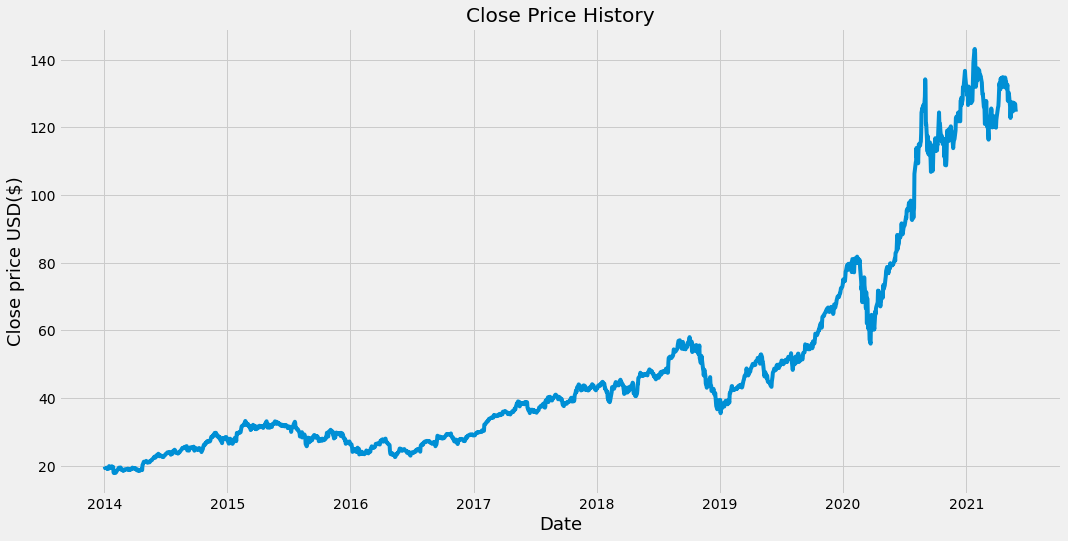

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD($)',fontsize=18)
plt.show()

## **Step2 : Preparing Data**

In [ ]:
#creating a new dataframe which contains only close rates
data = df.filter(['Close'])

#covert the dataframe into numpy array
dataset=data.values

#number of rows to train the data
training_data_len=math.ceil(len(dataset) * .8)
training_data_len

1492

In [ ]:
#Scale the data
#Most of the times , dataset contains features highly  varying in magnitudes, units and range.
#MinMax scaling brings the value to a specified range.
scaler = MinMaxScaler(feature_range=(0,1))
#fit and transform the data
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.01520506],
       [0.01174225],
       [0.01258301],
       ...,
       [0.86984349],
       [0.85731464],
       [0.85196795]])

In [ ]:
#creating training dataset
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
 
train_data

array([[0.01520506],
       [0.01174225],
       [0.01258301],
       ...,
       [0.38456978],
       [0.37517316],
       [0.37974176]])

In [ ]:
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)  
    print(y_train)
    print()

[array([0.01520506, 0.01174225, 0.01258301, 0.01147435, 0.01244907,
       0.01047112, 0.0094508 , 0.01024597, 0.01328413, 0.01641064,
       0.01552428, 0.01165389, 0.01404795, 0.01474337, 0.01607433,
       0.01319293, 0.01445549, 0.00191525, 0.00027646, 0.        ,
       0.0002337 , 0.00049876, 0.0025679 , 0.00365093, 0.00362813,
       0.00567162, 0.00832502, 0.01031153, 0.01030011, 0.01272552,
       0.0126001 , 0.01317013, 0.01071337, 0.00894064, 0.0072591 ,
       0.00791461, 0.00634994, 0.00500756, 0.00794882, 0.00754127,
       0.00797447, 0.00896628, 0.0092855 , 0.00882663, 0.00873829,
       0.00887509, 0.01034856, 0.01049677, 0.00879814, 0.00709951,
       0.00768377, 0.00901189, 0.00897199, 0.00824237, 0.00943084,
       0.01123209, 0.01288512, 0.01140024, 0.01073902, 0.01056801])]
[0.010533828371510456]



In [ ]:
#convert to numpy array
x_train,y_train = np.array(x_train),np.array(y_train)
x_train.shape

(1432, 60)

In [ ]:
#reshape the data i.e from 2d to 3d
#samples,timesteps,features
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1432, 60, 1)

## **Step3:Model Selection**

In [ ]:
model=Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

## **Step4: Training Network**

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=10 )

Epoch 1/10
1432/1432 [==============================] - 47s 30ms/step - loss: 4.3093e-04
Epoch 2/10
1432/1432 [==============================] - 41s 29ms/step - loss: 1.4763e-04
Epoch 3/10
1432/1432 [==============================] - 44s 31ms/step - loss: 1.3381e-04
Epoch 4/10
1432/1432 [==============================] - 42s 29ms/step - loss: 9.6316e-05
Epoch 5/10
1432/1432 [==============================] - 41s 29ms/step - loss: 8.8681e-05
Epoch 6/10
1432/1432 [==============================] - 43s 30ms/step - loss: 6.6327e-05
Epoch 7/10
1432/1432 [==============================] - 42s 29ms/step - loss: 5.8754e-05
Epoch 8/10
1432/1432 [==============================] - 44s 30ms/step - loss: 7.4180e-05
Epoch 9/10
1432/1432 [==============================] - 44s 31ms/step - loss: 5.6939e-05
Epoch 10/10
1432/1432 [==============================] - 44s 31ms/step - loss: 6.1028e-05


In [ ]:
#creating testing dataset
#new array containing values from scaled data set
test_data=scaled_data[training_data_len - 60:,:]

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

## **Step5: Predictions**

In [ ]:
#get models predicted price value
predictions=model.predict(x_test)
#unscaling the values
predictions=scaler.inverse_transform(predictions)

In [ ]:
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

6.205871944154895

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'Lower right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


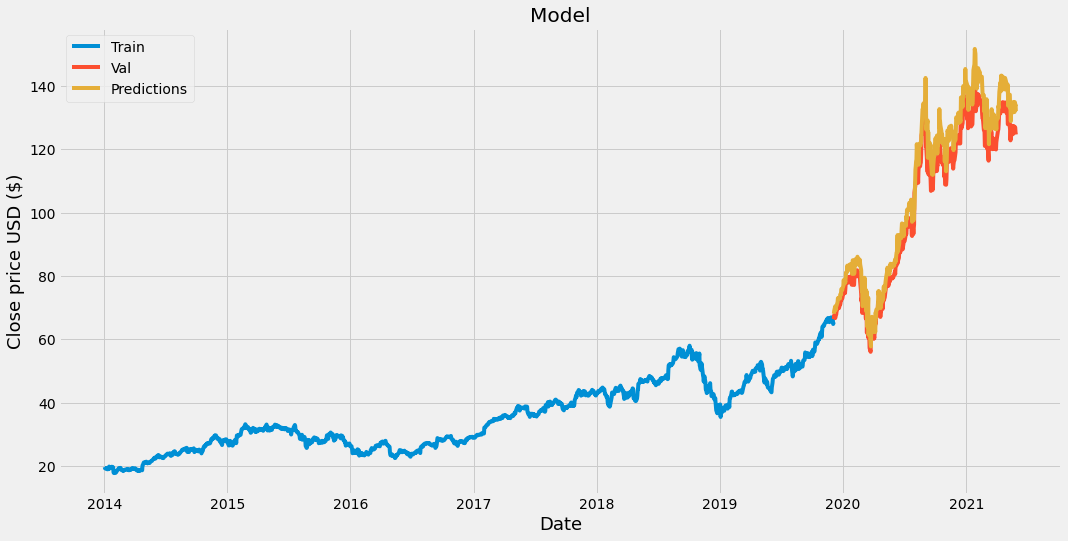

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel("Close price USD ($)",fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='Lower right')
plt.show()

In [ ]:
from datetime import datetime
import yfinance as yf
import pandas_datareader.data as pdr
import pandas as pd

yf.pdr_override()

start = datetime.strptime('2014-01-01', '%Y-%m-%d')
end = datetime.strptime('2021-06-01', '%Y-%m-%d')

apple_quote = pdr.get_data_yahoo("AAPL", start, end)
#create a new dataframe
new_df=apple_quote.filter(['Close'])
#get the last 60 days closing prices and convert the dataframe to an  array.
last_60_days= new_df[-60:].values
#scale tha data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#create an empty list
x_test=[]
#Append the past 60 days 
x_test.append(last_60_days_scaled)
#covert the X-test dataset into numpy array
x_test=np.array(x_test)
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the predicted scale price
pred_price=model.predict(x_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

ModuleNotFoundError: ignored

# New Section